# Project: Colours in Astronomy

Ex-3 
Blackbody energy distribution curve for a given temperature

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
from astropy import units as u
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
%matplotlib inline

In [73]:
wavelengths=np.arange(100,30000,300)*u.AA
def rp(T,wv=wavelengths):
    exponential = 1/(np.exp(const.h*const.c/(wv*const.k_B*T))-1)
    prefactor = 2*np.pi*const.h*const.c*const.c/wv**5
    return prefactor*exponential
    #coeff=(2*np.pi*(const.c**2)*const.h)
    #var=(1/wv**5)*(1/((np.exp((const.c*const.h)/(wv*const.k_B*T)))-1))
    #return coeff*var
def rp_norm(T,wv=wavelengths):
    pwr=radiated_power(T)
    max_=np.max(pwr.value)
    return radiated_power(T,wv)/max_,max_
def rp_point_norm(T,wv):
    pwr,peak=radiated_power_normalised(T)
    return (((radiated_power((T),wv)).value)/peak)


In [122]:
T1=5000*u.K
radiated_power_5000,peak_wv_5000=rp_norm(T1)
T2=12500*u.K
radiated_power_12500,peak_wv_12500=rp_norm(T2)

In [123]:
#peak wavelengths
peak_B=4400*u.AA
peak_V=5500*u.AA
power=radiated_power_5000.unit
##ax.plot([t,t],[0,np.sin(t)], color ='red',  linewidth=1.5, linestyle="--") ##

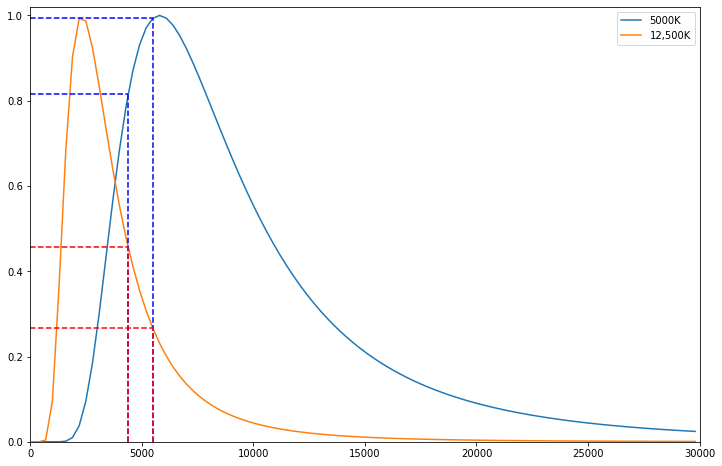

In [129]:
board=plt.figure(figsize=(12,8))
fig=board.add_subplot(1,1,1)
fig.plot(wavelengths,radiated_power_5000,label='5000K')
fig.plot(wavelengths,radiated_power_12500,label='12,500K')
fig.plot([peak_B.value,peak_B.value]*u.AA,[0,(rp_point_norm(T1,peak_B))]*power, color ='blue',  linewidth=1.5, linestyle="--")
fig.plot([0,peak_B.value]*u.AA,[(rp_point_norm(T1,peak_B)),(rp_point_norm(T1,peak_B))]*power, color ='blue',  linewidth=1.5, linestyle="--")
fig.plot([peak_V.value,peak_V.value]*u.AA,[0,(rp_point_norm(T1,peak_V))]*power, color ='blue',  linewidth=1.5, linestyle="--")
fig.plot([0,peak_V.value]*u.AA,[(rp_point_norm(T1,peak_V)),(rp_point_norm(T1,peak_V))]*power, color ='blue',  linewidth=1.5, linestyle="--")

fig.plot([peak_B.value,peak_B.value]*u.AA,[0,(rp_point_norm(T2,peak_B))]*power, color ='red',  linewidth=1.5, linestyle="--")
fig.plot([0,peak_B.value]*u.AA,[(rp_point_norm(T2,peak_B)),(rp_point_norm(T2,peak_B))]*power, color ='red',  linewidth=1.5, linestyle="--")
fig.plot([peak_V.value,peak_V.value]*u.AA,[0,(rp_point_norm(T2,peak_V))]*power, color ='red',  linewidth=1.5, linestyle="--")
fig.plot([0,peak_V.value]*u.AA,[(rp_point_norm(T2,peak_V)),(rp_point_norm(T2,peak_V))]*power, color ='red',  linewidth=1.5, linestyle="--")

fig.set_xlim([0,30000])
fig.set_ylim([0.0,1.02])
fig.legend()

In [117]:
temparatures=np.arange(3000,20000,1800)*u.K
temparatures[3]+=490*u.K
temparatures

<Quantity [ 3000.,  4800.,  6600.,  8890., 10200., 12000., 13800., 15600.,
           17400., 19200.] K>

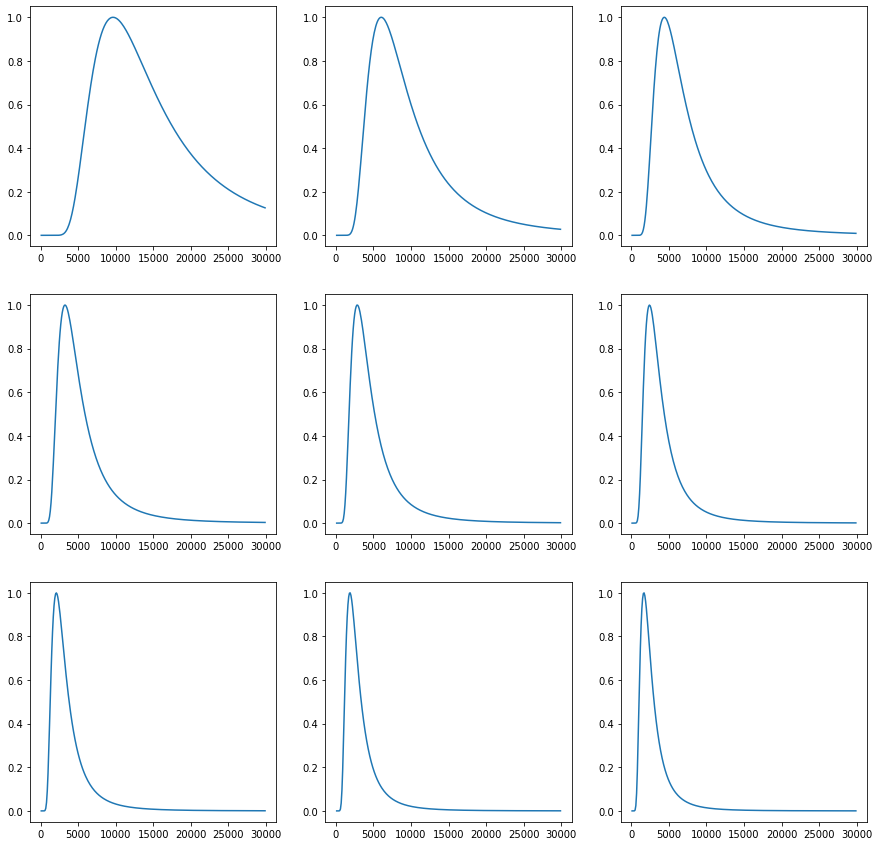

In [18]:
board2=plt.figure(figsize=(15,15))
figures=[1,2,3,4,5,6,7,8,9]
for i in range(9):
    figures[i]=board2.add_subplot(3,3,i+1)
    figures[i].plot(wavelengths,radiated_power_normalised(temparatures[i])[0])

In [98]:
T_vega=9790*u.K
FB_vega=rp(T_vega,peak_B)
FV_vega=rp(T_vega,peak_V)
def BV_peaks(t):
    F_B=rp(t,peak_B)
    F_V=rp(t,peak_V)
    B_V=(-2.5)*np.log10((F_B/F_V)*(FV_vega/FB_vega))
    return B_V

In [119]:
F_B_vega=np.mean(rp(T_vega,np.arange(3400,5400,100)*u.AA))
F_V_vega=np.mean(rp(T_vega,np.arange(4500,6400,100)*u.AA))
def BV_range(t):
    F_B=rp(t,np.arange(3400,5400,100)*u.AA)
    F_V=rp(t,np.arange(4500,6400,100)*u.AA)
    B_V=(-2.5)*np.log10((np.mean(F_B)/np.mean(F_V))*(F_V_vega/F_B_vega))
    return B_V

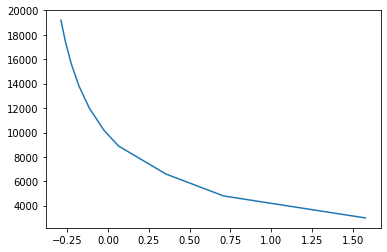

In [126]:
bvs=[]
bvps=[]
for i in temparatures:
    bvs.append(BV_range(i))
    bvps.append(BV_peaks(i))
plt.plot(bvs,temparatures)
#plt.plot(bvps,temparatures)

In [ ]:
BV_spica=-0.13
T_spica=

In [37]:
file=fits.open('M32_V_ExpTime60s_1.fit')
file.info()

Filename: M32_V_ExpTime60s_1.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (2048, 2048)   int16 (rescales to uint16)   


In [34]:
data=file[0].data

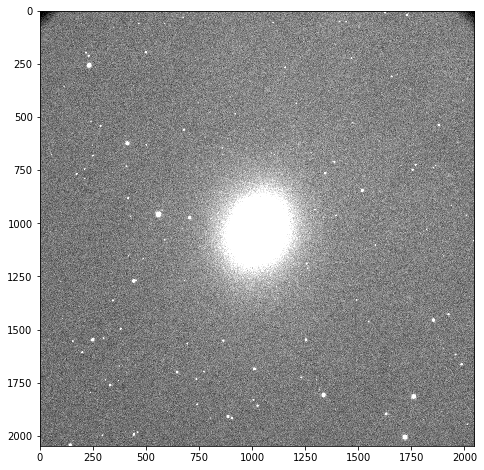

In [35]:
mean,median,std=sigma_clipped_stats(data)
board2=plt.figure(figsize=(8,8))
fig2=board2.add_subplot(1,1,1)
fig2.imshow(data, vmin=median-6*std,vmax=median+6*std,cmap='gray')
fig2.colorbar()